In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

In [12]:
def FFT(x):
    N = len(x)
    if N % 2 != 0:
        raise ValueError("N is not power of 2")
    if N <= 2 ** 6:
        return DFT(x)
    
    even = FFT(x[::2])
    odd = FFT(x[1::2])
    n = np.arange(N)
    e = np.exp(-2j * np.pi * n / N)
    return np.concatenate([even + e[:int(N/2)] * odd,
                               even + e[int(N/2):] * odd])

In [13]:
x = [1 ,2 ,3, 4, 5, 1, 2, 3] * 10

In [14]:
np.allclose(np.fft.fft(x), FFT(x))

True

In [15]:
def convolve1d(x, y):
    size = x.size + y.size - 1
    result = np.zeros(size)
    for i in range(size):
        res = 0
        for j in range(len(x)):
            if i - j >= 0 and len(y) > i - j:
                res += x[j] * y[i - j]
        result[i] = res
    return result

In [16]:
def fconvolve1d(x, y):
    size = x.size + y.size - 1
    new_x = np.concatenate([x, np.zeros(abs(size - x.size))])
    new_y = np.concatenate([y, np.zeros(abs(size - y.size))])
    fx = np.fft.fft(new_x)
    fy = np.fft.fft(new_y)
    return np.fft.ifft(fx * fy)

In [17]:
a = np.array([1, -1, 34, 32, 32])
b = np.array([12 ,3 , 4])

In [18]:
np.allclose(fconvolve1d(a, b), np.convolve(a, b))

True

In [19]:
np.allclose(convolve1d(a, b), np.convolve(a, b))

True

In [18]:
rect = np.concatenate([np.array([0 for _ in range(10)]), np.array([1 for _ in range(10)]), np.array([0 for _ in range(10)])])

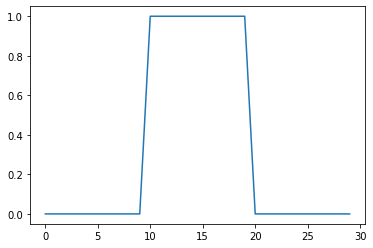

In [19]:
plt.plot(rect)

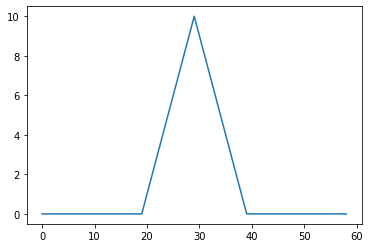

In [20]:
plt.plot(np.convolve(rect, rect))

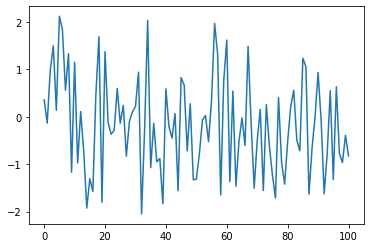

In [21]:
noise1 = np.random.normal(0, 1, 101)
noise2 = np.random.normal(0, 1, 101)
plt.plot(noise1)
# plt.plot(noise2)

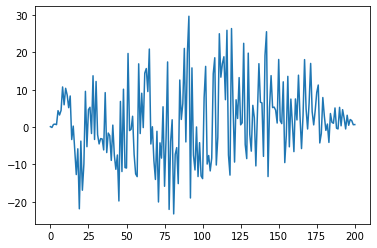

In [22]:
plt.plot(np.convolve(noise1, noise1))

In [23]:
sample_rate = 100
ts = 1.0 / sample_rate
t = np.arange(0, 1 + ts, ts)
freq = 1.
x_sin = np.sin(2 * np.pi * freq * t)

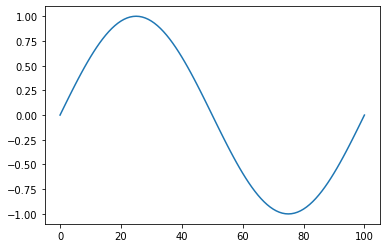

In [24]:
plt.plot(x_sin)

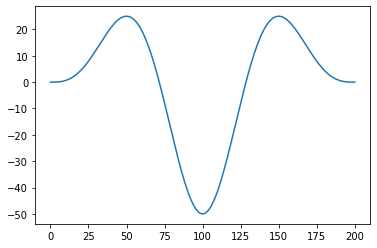

In [25]:
plt.plot(np.convolve(x_sin, x_sin))

In [157]:
f = np.array([1 if i < 25 else -1 for i in range(51)] * 10, dtype=float)

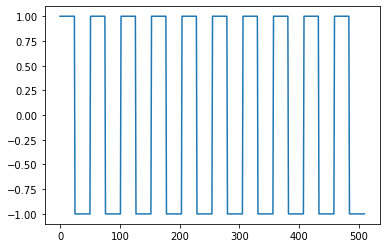

In [158]:
plt.plot(f)

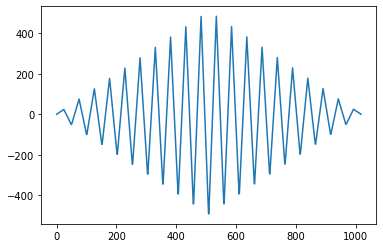

In [159]:
plt.plot(np.convolve(f, f))

In [51]:
def correlation(x, y):
    s = np.zeros(x.size + y.size - 1)
    for n in range(s.size):
        for m in range(x.size):
            if 0<=(m - n)<y.size:
                s[n] += x[m] * y[m-n]
    return s

In [131]:
def fcorrelation(x, y):
    size = x.size + y.size - 1
    new_x = np.concatenate([np.zeros(abs(y.size - 1)), x])
    new_y = np.concatenate([y, np.zeros(abs(x.size - 1))])
    fx = (np.fft.fft(new_x))
    fy = (np.fft.fft(new_y))
    return np.real(np.fft.ifft((fx) * np.conjugate(fy)))

In [132]:
x = np.array([12, 32, 32, 12, 12])
y = np.array([1, 2, 3, -1, -12])

In [137]:
np.allclose(np.correlate(x, y, 'full'), fcorrelation(x, y))

True

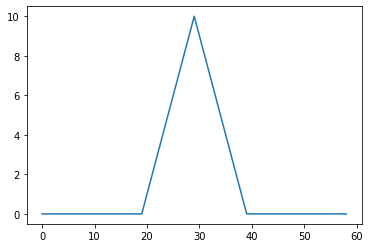

In [152]:
plt.plot(np.correlate(rect, rect, 'full'))

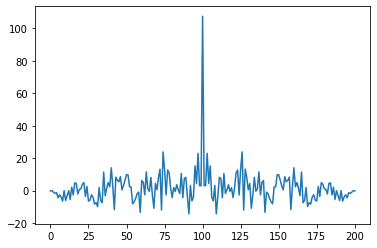

In [145]:
plt.plot(np.correlate(noise1, noise1, 'full'))

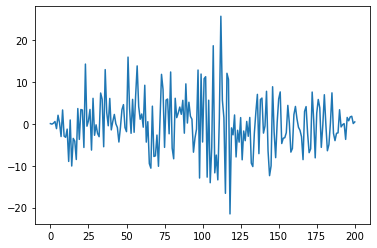

In [146]:
plt.plot(np.correlate(noise1, noise2, 'full'))

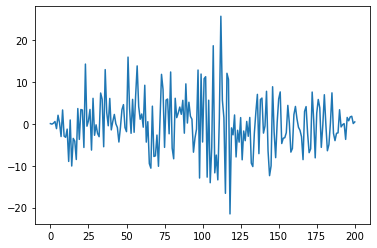

In [147]:
plt.plot(np.correlate(noise1, noise2, 'full'))

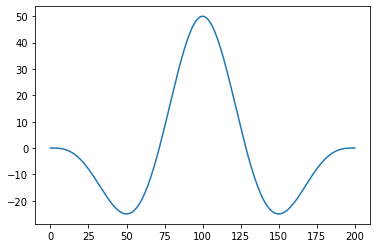

In [148]:
plt.plot(np.correlate(x_sin, x_sin, 'full'))

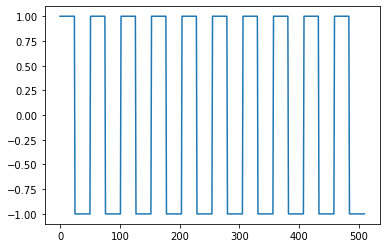

In [149]:
plt.plot(f)

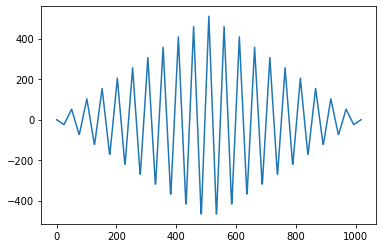

In [150]:
plt.plot(np.correlate(f, f, 'full'))